# HR Analytics Project

## Business scenario: AlphaLogistics (Hypothetical)

AlphaLogistics, a leading global supply chain and logistics conglomerate has experienced a noticeable turnover rate, and HR leadership is expecting deeper insights into the factors leading employees to leave the company. The HR team has been conducting surveys on employees to gather data, but now requires an analyst to turn the data into insights. By conducting exploratory data analysis (EDA), we can systematically examine the historical HR data to uncover trends an patterns around employee attrition.

### Objective
* Gather, clean, and visualize employee data to identify any associations among demographics, tenure, performance, and other variables.
* Provide actionable insights on which employee segments are most at risk and why.
* Find root causes for why employees are leaving.
* Crete a presentation for HR executives for strategic insights on employee retention.

### Key Deliverables
* Cleaned dataset - Data cleaning to ensure no missing values, outliers or duplicates before starting EDA.
* EDA and visualizations - Using charts and tables to explore variables, trends, correlations and outliers.
* Initial recommendations - Brief presentation to C-suite executives.

### Key Stakeholders and Audience
* C-suite executives - convey key insights of the current state of the company
* HR executives - give strategic insights to assist shaping policies
* Operational managers - Managers and team leads who will use these findings to address day-to-day employee concerns, and think of immediate impacts.




## Dataset

The [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), consists of 14,999 rows, 10 columns, and the following variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### 1) Importing and loading the dataset

Loading necessary libraries and packages.

In [42]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying data frames
pd.set_option('display.max_columns', None)

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
file_path = '/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv'
data = pd.read_csv(file_path)
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2) Understanding the data

Before creating a model, crucial to see the data type of columns and descriptive statistics to identify missing/outlier data.

In [43]:
# Understand column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


There seem to be no inconsistencies on the column name and the data type.
However, seeing how column names are inconsistent, renaming columns to standardize all names in snake_case to make names more concise and correct spelling mistakes.

In [44]:
# Create a dictionary with keys to identify wrong names and values to the correct snake_case format
data = data.rename(columns = {'Work_accident': 'work_accident',
                             'average_montly_hours': 'avg_monthly_hours',
                              'time_spend_company': 'tenure',
                              'Department': 'department'})
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### 3) Data Cleaning

Checking for any missing values, duplicates and outliers.

In [45]:
# Although data.info already proved there are no missing values, re-checking for any missing input.
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hours        0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [46]:
# Check for duplicates
data.duplicated().sum()

3008

In [47]:
# Duplicates approximate 20% of the dataset (3,008/14,999)
# Explore duplicate roes to decide next steps
data[data.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


Due to the unlikelihood that two employees can self-report the exact same response across 10 columns, I decided to drop the data (they are incorrect entries).

Yet, if additional validation were to be required, could perform a likelihood analysis by using Bayes' theorem to multiply the probabilities of finding each value in each column.

In [48]:
# Drop duplicates and save results in a new variable
cleaned_data = data.drop_duplicates(keep='first')

# Check the unique number of rows
cleaned_data.shape

(11991, 10)

In [49]:
# Checking for outliers, using descriptive statistics to find columns with potential outliers.
cleaned_data.describe()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


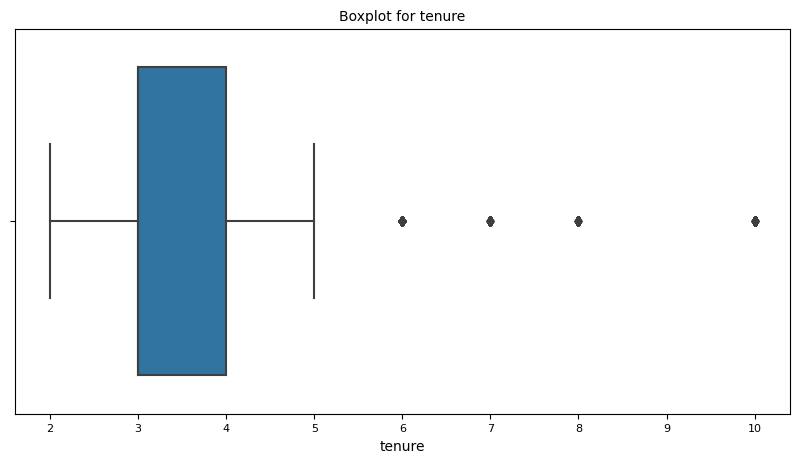

In [50]:
# Satisfaction, work_accident, left and promotion are binary variables
# The max value of tenure seems to be over 3 standard deviations
## Creating a boxplot to visualize the distribution of the 'tenure' column
plt.figure(figsize=(10,5))
plt.title('Boxplot for tenure', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=cleaned_data['tenure'])
plt.show()

In [51]:
# See the number of rows that have outliers (1.5 x IQR)

# 25, 75 percentile values and interquartile range
percentile25 = cleaned_data['tenure'].quantile(0.25)
percentile75 = cleaned_data['tenure'].quantile(0.75)
iqr = percentile75-percentile25

# Define upper and lower limit for non-outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Lower limit is:', lower_limit)
print('Upper limit is:', upper_limit)

# Subset data to the ones only containing outliers
outlier = cleaned_data[(cleaned_data['tenure'] > upper_limit) | (cleaned_data['tenure'] < lower_limit)]
print('Number of outliers in tenure:', len(outlier))

Lower limit is: 1.5
Upper limit is: 5.5
Number of outliers in tenure: 824


Seeing 824 is a meaningful number of outliers.

Will leave for now as certain models can be very sensitive to outliers, and the outliers can be considered to either be removed or imputed.

## 4) Exploratory Data Analysis (EDA)

Need to first understand the absolute number and proportion of current and former employees.

In [52]:
# Getting number of people who left vs. stayed
print(cleaned_data['left'].value_counts())
print()
# Employees who left but in percentage
print(cleaned_data['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### 4-1) Correlation matrix

With the clear understanding of the distribution between current and former employees, we will use a correlation matrix that offers a quick, high-level snapshot of how the variables interact with each other.
By examining which pairs of variables align positively or negatively, we can uncover noteworthy relationships to explore further. Keeping in mind that correlation does not confirm causation, it will highlight which variables to investigate for valuable discoveries.

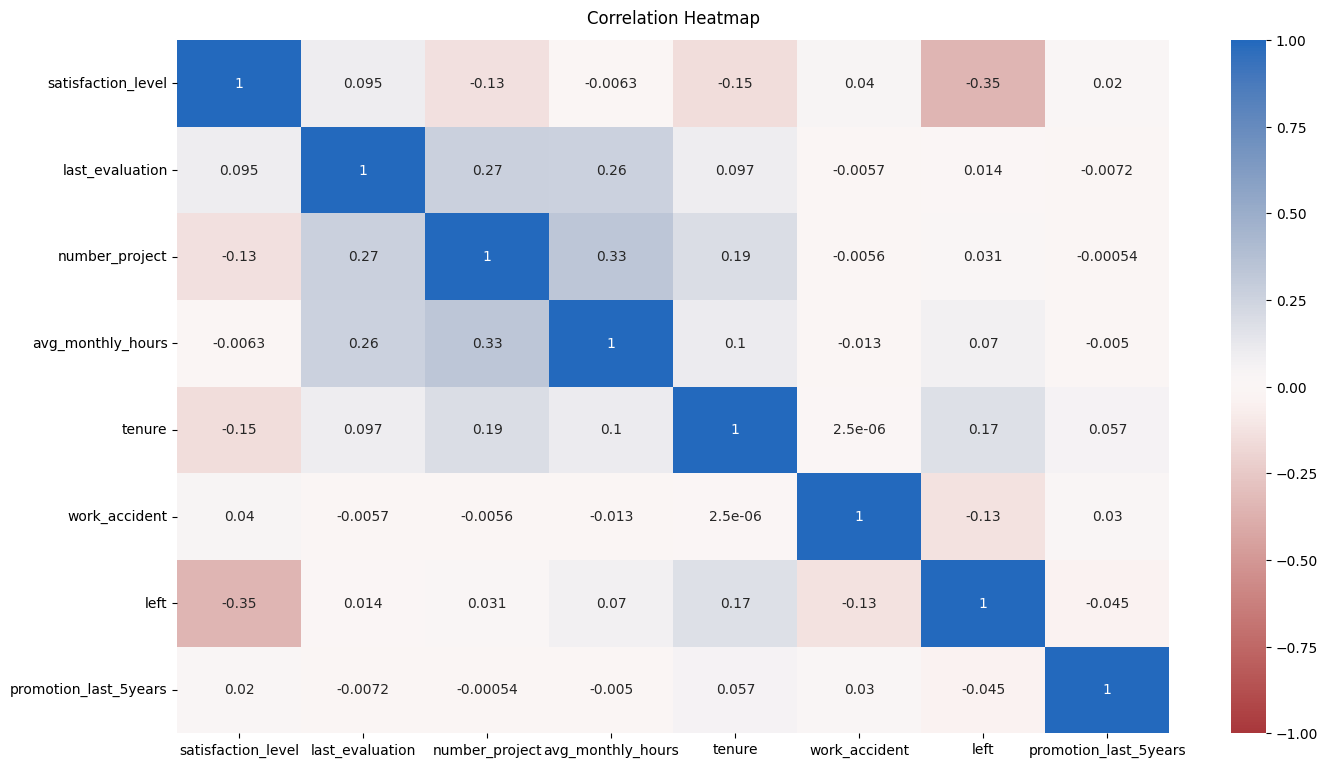

In [53]:
# Plotting a correlation heatmap between variables

# Droping the two categorical values salary and department to see correlation levels
numeric_data = cleaned_data.select_dtypes(include=['number'])

# Drawing correlation heatmap between numeric variables
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag_r", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The correlation heatmap is useful to understand how variables interact with each other, and from this graph, we can see the following insights:
1. Satisfaction level and left have the strongest negative relationship, indicating that employees who leave the company report lower satisfaction scores.
2. Evaluation scores, number of projects and average monthly hours share positive correlations. This implies that workers with high evaluations may be involved with more projects and more work hours.
3. Tenure has modest correlations with some variables, but may not be the strongest predictor of turnover on its own. It interacts with other factors such as satisfactino and salary.
4. Promotion in the last 5 years has slight correlations with most of the other variables, suggesting that promotions alone cannot explain turnover or satisfaction.

These preliminary insights establish a strong basis for forming key assumptions about potential drivers of employee attrition. In the next stage of our analysis, we will explore each assumption more deeply to understand why employees may be leaving:
* Average Monthly Hours vs. Number of Projects: We hypothesize that employees who log more hours are also assigned more projects. By examining the data distribution, we aim to determine whether these employees are overworked and how workload might contribute to turnover.
* Satisfaction Level, Average Monthly Hours, and Tenure: Extended working hours could correlate with lower satisfaction, and tenure may worsen this effect. Given the slight negative correlation between tenure and satisfaction, we will investigate whether longer service combined with higher workloads leads to disengagement.
* Tenure and Salary: Employees with longer tenures could potentially earn higher salaries, which might discourage them from leaving. Our goal is to confirm whether salary increases indeed offset other factors (e.g., job stress or lack of career growth).
* Average Monthly Hours, Evaluation, and Promotion: Investing more time at work could lead to faster promotions, enhancing employee motivation. However, if individuals feel undervalued or overlooked in other areas, even the promise of advancement may not be enough to retain them.

### 4-2) Average monthly hours vs. Number of projects


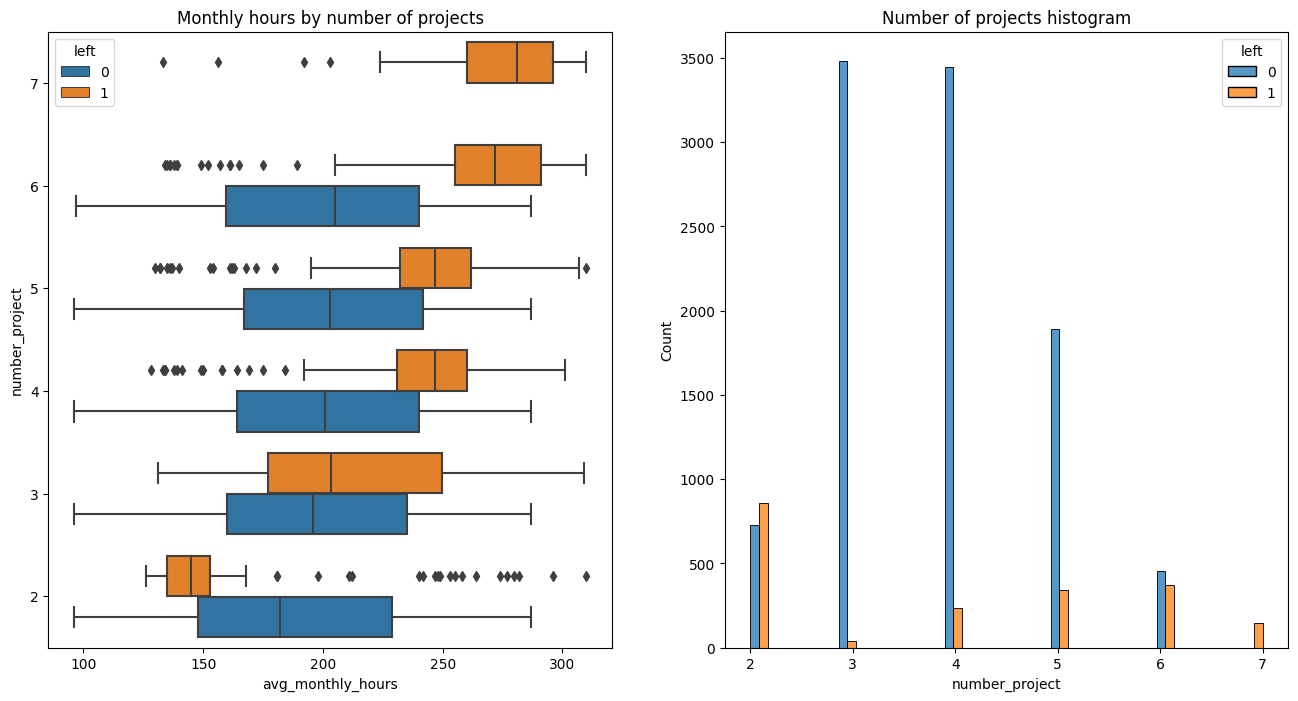

In [54]:
# Begin by looking at avg_monthly_hours and number_project distributions from current and former employees.
# Check with distribution of number_projects to see what sample sizes they represent
fig, ax = plt.subplots(1, 2, figsize = (16,8))

# Boxplot showing avg_monthly_hours distributions for number of projects
sns.boxplot(data=cleaned_data,  x='avg_monthly_hours', y='number_project', hue='left', orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects',fontsize='12')

# Histogram of 'number_project' to see sample size representation
sns.histplot(data=cleaned_data, x='number_project', hue='left', multiple='dodge',ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='12')

plt.show()

Data confirms our hypothesis that for former employees, working longer hours also work in more projects. The mean hours of each working group increases (shifts to the right) as the number of projects increases.
There are 4 main insights from these graphs:
1. There are two groups of former employees: those who worked significantly less than their peers with the same number of projects, or those who worked more. We can infer that employees in the first group were possibly fired or given notice to quit, which could account for working fewer hours than their peers. Employees in the second group probably quit, and were overworked by being the largest contributors in their projects.
2. Everyone with 7 projects left the company, possibly signaling overworking. Furthermore, those who left and worked on 6 or 7 projects had a significantly higher avg working interquartile range (between approx. 250~300).
3. The number of projects with the lowest ratio of current vs. former employees is 3 and 4, indicating a potential 'optimal' number of projects.
4. The average monthly working hours is around 200 for almost all cohorts, with those that left being significantly higher. Assuming 2 weeks of vacations, 40 hours per week, workers should be amounting to 167 hours per month. Employees in this company are being overworked.

In [55]:
# Confirming that all employees with 7 projects left (due to discrepancies from the visualization)
cleaned_data[cleaned_data['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

### 4-3) Satisfaction level, average monthly hours and tenure


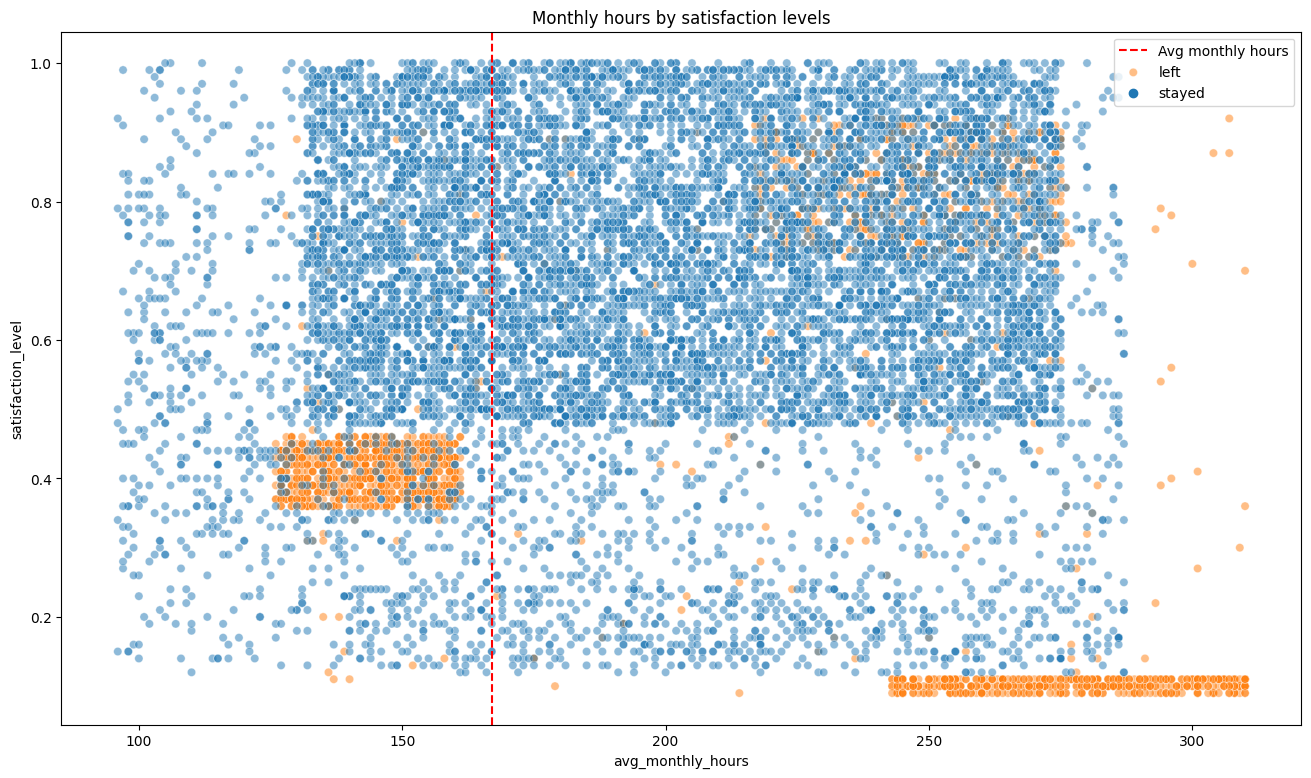

In [56]:
# Examining satisfaction_level with avg_monthly_hours
## Plotting a scatterplot to visualize satisfaction levels of employees depending on working hours

plt.figure(figsize = (16, 9))
plt.axvline(x=167, color='red', label='Avg working hours', ls='--')
sns.scatterplot(data=cleaned_data, x='avg_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.legend(labels=['Avg monthly hours','left','stayed'])
plt.title('Monthly hours by satisfaction levels', fontsize='12')
plt.show()

The scatterplot shows that there are three groups of former employees, with different satisfaction levels:
1. The first group worked less than the monthly average (~130-160 hours) and had a satisfaction level of ~0.4. This group was likely to be pressured to work more considering how the average worker in this company works more than the 40 hour per week average. However, it is hard to decide what was the key determining factor for their low satisfaction.
2. There is a group who worked ~210-270 hours with a satisfaction level of ~0.7-0.9. These workers seemed to be overworked, but satisfied with their company. Additional analysis is needed to find underlying root causes for why they leave.
3. Finally, there is an overworked group with very low satisfaction levels, working around ~240-320 with satisfaction levels lower than 0.2. This group can potentially be similar to those with multiple responsibilities, being overworked.

Based on these findings, tenure can be a variable that may shed light on satisfaction levels among these groups. It may influence how strongly an employee identifies with the organization over time, potentially affecting motivation, loyalty and satisfaction.

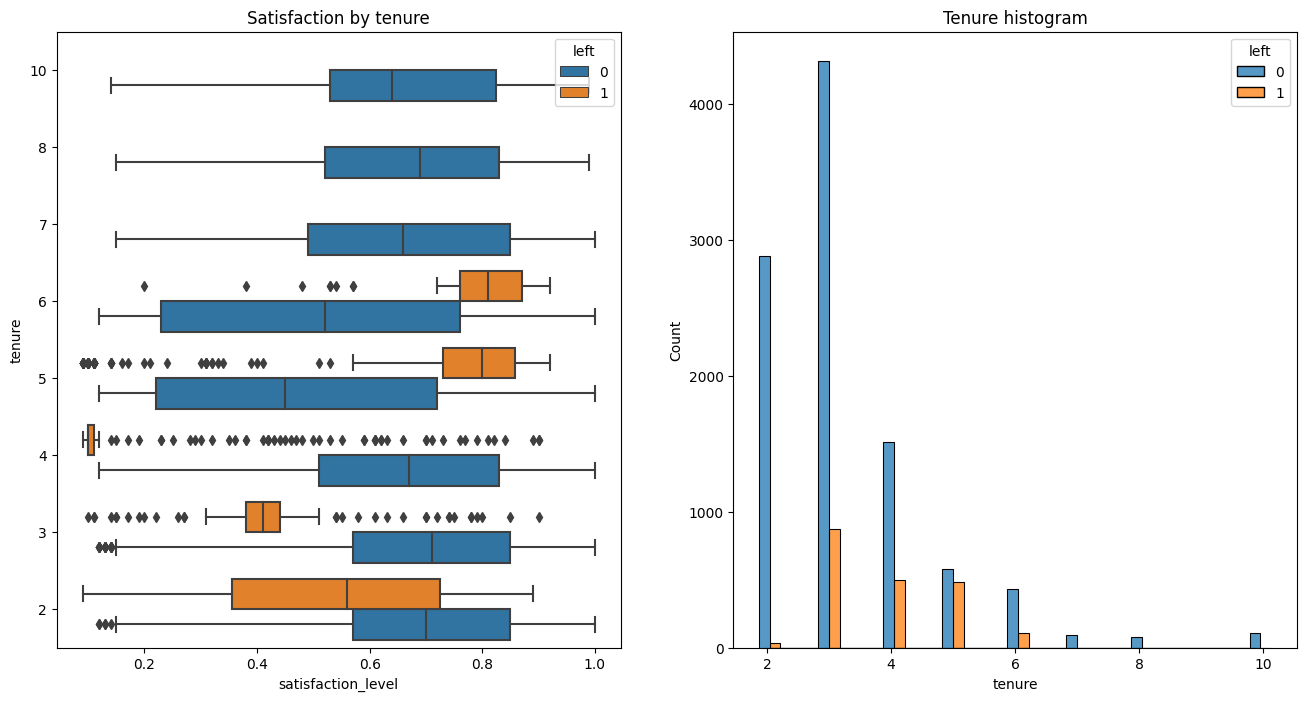

In [57]:
# Examining satisfaction and tenure
## Creating boxplot and histogram (similar to hours by number of projects)

fig, ax = plt.subplots(1,2, figsize= (16,8))

# Boxplot of satisfaction_level by tenure
sns.boxplot(data=cleaned_data, x='satisfaction_level', y='tenure',hue='left',orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='12')

# Histogram
sns.histplot(data=cleaned_data, x='tenure',hue='left',multiple='dodge',shrink=4, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='12')

plt.show()

From these variables we can observe that:
1. Former employees fall into 2 categories: dissatisfied employees with short tenure, and 5-6 year medium tenure with high satisfaction.
2. There is one anomaly for 4-year tenure employees, having a satisfaction level lower than 0.1. Worth noting that there may be some changes or policies that might have affected 4-year tenure workers.
3. Longest tenured employees 7 and above did not leave. The satisfaction level is similar to those with short tenures (under 4 years).
4. Histogram shows a skewed distribution, with a large number of employees with short tenure.

By analyzing tenure, it could be meaningful to compare the mean and median satisfaction scores of former and current employees. Furthermore, seeing the proportion of current and former employees by tenure can shed light on which tenure bracket has the most turnover.

In [58]:
# Mean and median of satisfaction scores based on left
cleaned_data.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [59]:
# Calculating the proportion of current/former employees by tenure
cleaned_data.groupby(['tenure'])['left'].value_counts(normalize=True)

tenure  left
2       0       0.989347
        1       0.010653
3       0       0.831599
        1       0.168401
4       0       0.753117
        1       0.246883
5       0       0.546139
        1       0.453861
6       0       0.798893
        1       0.201107
7       0       1.000000
8       0       1.000000
10      0       1.000000
Name: proportion, dtype: float64

Mean and median satisfaction of those who left are almost 0.2 points lower than current employees. An interesting note is that the mean satisfaction is lower than the median for current employees. This indicates that satisfaction level of current employees is skewed to the left.

Now that we have analyzed tenure, we can examine satisfaction levels with salary to uncover any relationships.

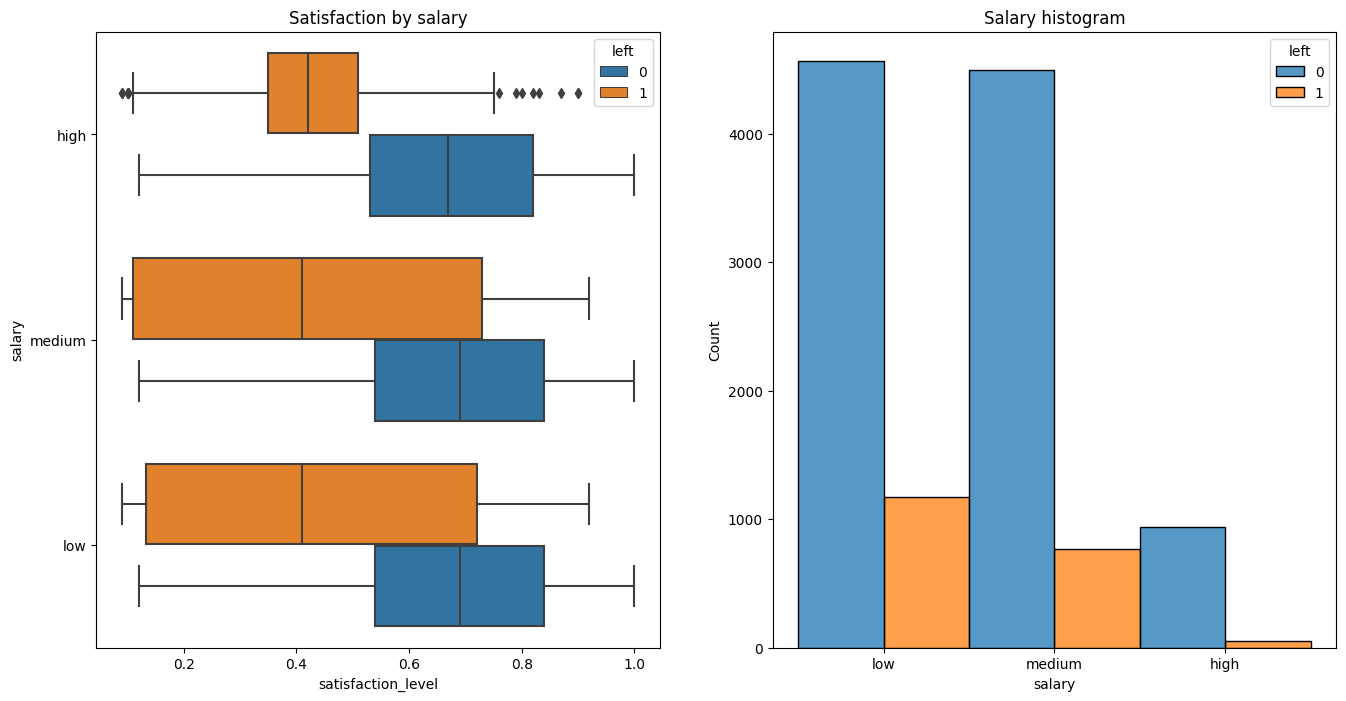

In [60]:
# Examining satisfaction and salary
## Creating boxplot and histogram

fig, ax = plt.subplots(1,2, figsize= (16,8))

# Boxplot of satisfaction_level by salary
sns.boxplot(data=cleaned_data, x='satisfaction_level', y='salary',hue='left',orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by salary', fontsize='12')

# Histogram
sns.histplot(data=cleaned_data, x='salary',hue='left',multiple='dodge', ax=ax[1])
ax[1].set_title('Salary histogram', fontsize='12')

plt.show()

Satisfaction and salary levels do not seem to show any meaningful insights. We do not see an increase in satisfaction of current employees based on salary. However, we do see that among former employees, the satisfaction level has a higher distribution for medium and lower salaries.

### 4-4) Tenure by salary
Since salary and satisfaction did not yield results, we will continue to analyze it by salary.
As mentioned before, we will logically assume that higher tenure is linked with a higher salary.

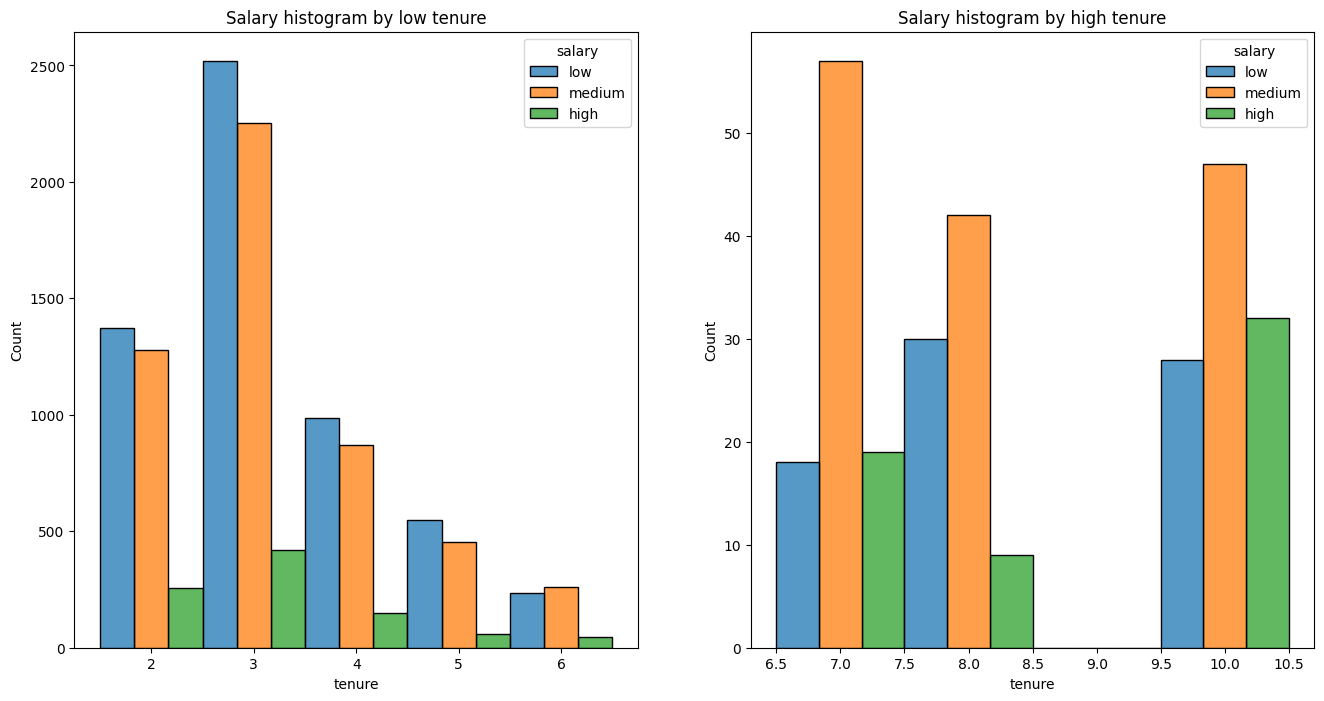

In [61]:
# Dividing tenure to low (under 6) and high (over 7).
low_tenure = cleaned_data[cleaned_data['tenure']<7]
high_tenure = cleaned_data[cleaned_data['tenure']>6]

# Plotting histogram of different tenures by salary
fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.histplot(data=low_tenure, x='tenure',hue='salary',discrete=1,hue_order=['low','medium','high'],
            multiple='dodge', ax=ax[0])
ax[0].set_title('Salary histogram by low tenure', fontsize = '12')

sns.histplot(data=high_tenure, x='tenure',hue='salary',discrete=1,hue_order=['low','medium','high'],
            multiple='dodge', ax=ax[1])
ax[1].set_title('Salary histogram by high tenure', fontsize = '12')

plt.show()

The distribution proves the previous hypothesis to be incorrect. Higher tenure does not mean higher salaries, meaning that long-tenured employees are not disproportionately comprised of higher-paid employees.

### 4-5) Average working hours and evaluations

Finally, we will look at the final assumption and confirm whether average working hours has a strong relation with evaluation scores.

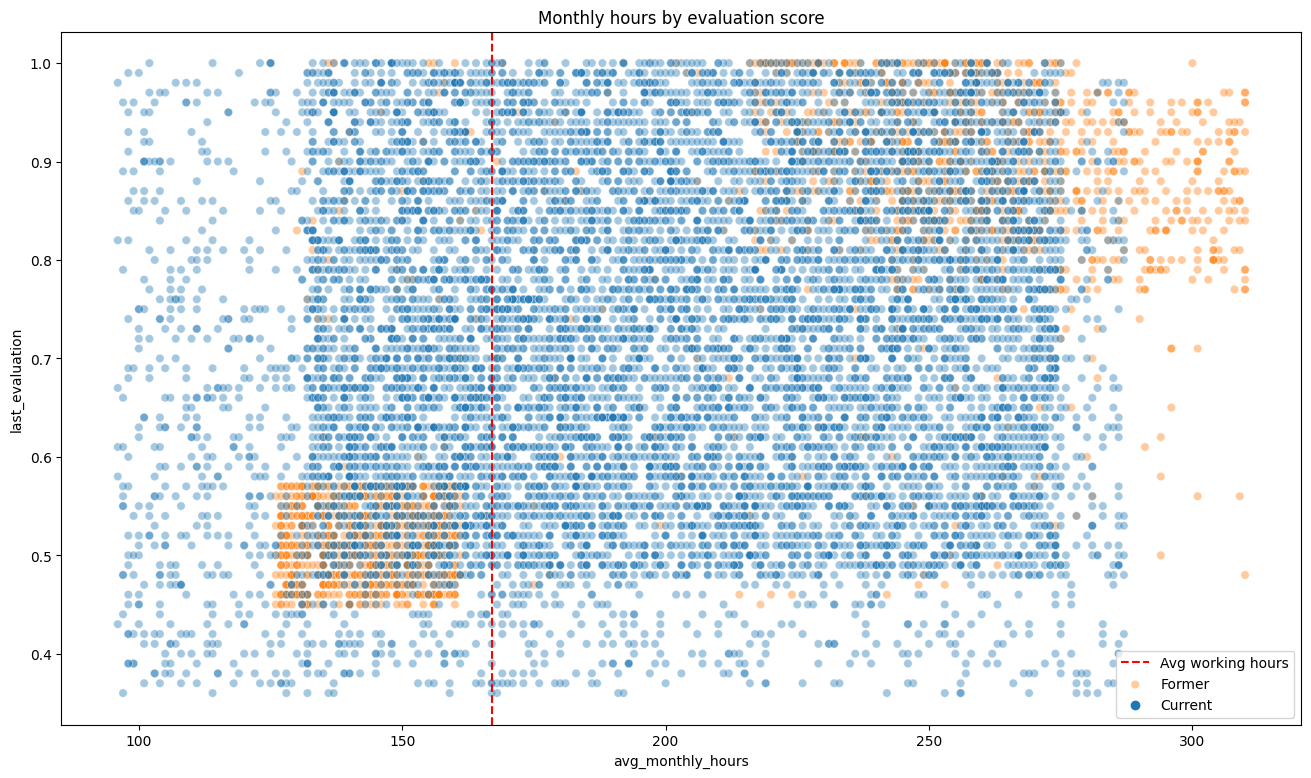

In [62]:
# Examining avg_working_hours and last_evaluation

plt.figure(figsize=(16,9))
plt.axvline(x=167, color='red', label='Avg working hours', ls='--')
sns.scatterplot(data=cleaned_data, x='avg_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.legend(labels=['Avg working hours', 'Former', 'Current'])
plt.title('Monthly hours by evaluation score', fontsize='12')
plt.show()

The working hour and evaluation scatterplot shows two meaningful observations:
* The scatterplot shows two groups former employees: High-performing, overworked employees and low-performing employees working less than the national average.
* Although there is a slight correlation between working hours and evaluation scores, the distribution shows that working long hours does not guarantee a good evaluation score.

Since we do see a slight correlation between working hours and evaluation scores, we will examine whether working hours also relates to a promotion.

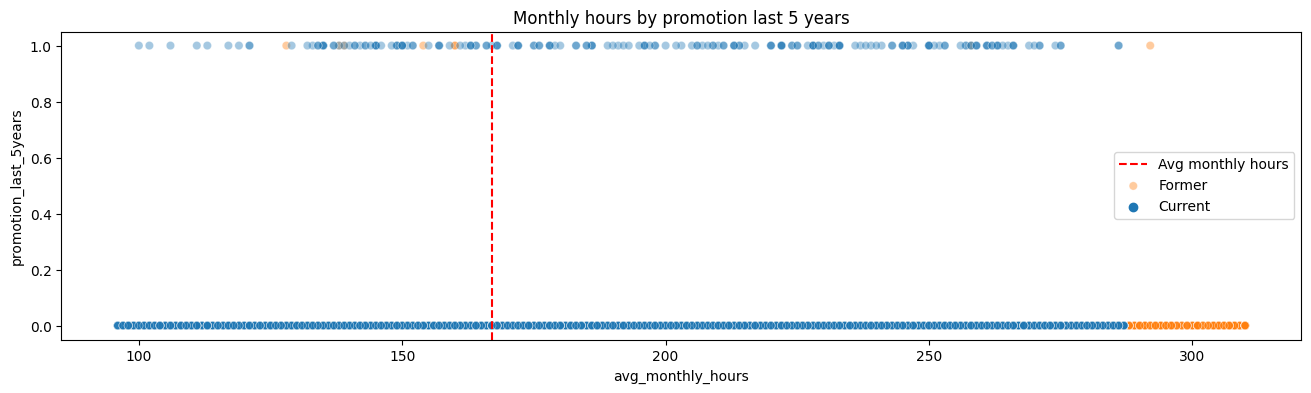

In [63]:
# Examining 'avg_monthly_hours' and 'promotion_last_5years'
plt.figure(figsize=(16,4))
# Adding a red line showing a 40-hour per week average
plt.axvline(x=167, color='red',ls='--')
sns.scatterplot(data=cleaned_data, x='avg_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.legend(labels=['Avg monthly hours', 'Former','Current'])
plt.title('Monthly hours by promotion last 5 years', fontsize='12')
plt.show()

This plot confirms three meaningful statements:
1. Very few employees who were promoted in the last 5 years have left.
2. Very few of the employees working the most hours were actually promoted.
3. All of the most hard-working employees have left the company.

There is a clear problem in management not recognizing the hardest workers with the highest contributions.

We will finally deep-dive to see the distribution of former employees across departments.

In [64]:
# Understand # of employees for each department
cleaned_data['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

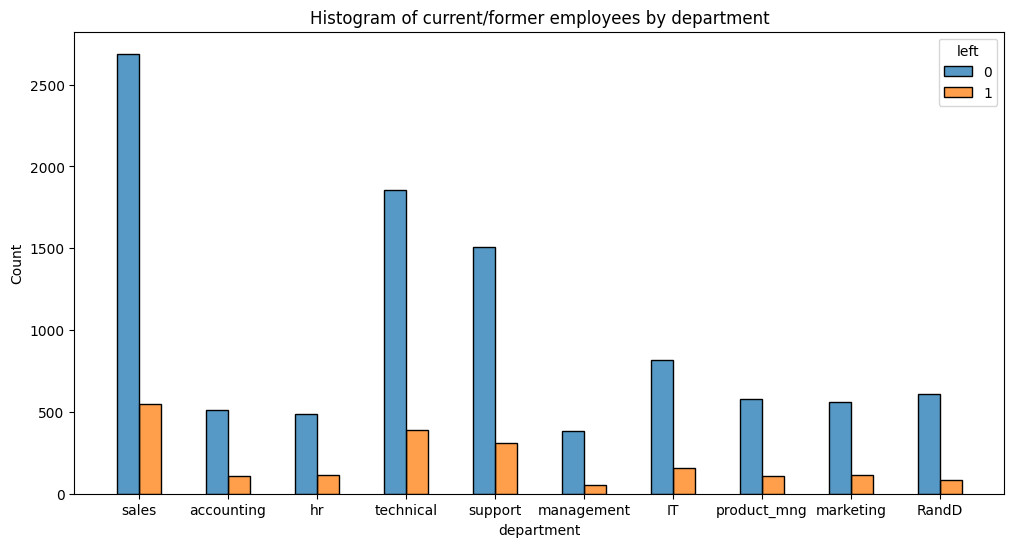

In [65]:
# Seeing how sales and technical roles have the most members;
# We will see whether former employees left from one specific function.

# Stacked histogram to compare the distribution by department, by 'left'
plt.figure(figsize=(12,6))
sns.histplot(data=cleaned_data, x='department', hue='left', discrete=1, hue_order=[0,1], multiple='dodge', shrink=.5)
plt.xticks(rotation='horizontal')
plt.title('Histogram of current/former employees by department', fontsize='12')
plt.show()

In [66]:
# See the ratio of current/former employees by department.
cleaned_data.groupby(['department'])['left'].value_counts(normalize=True)

department   left
IT           0       0.838115
             1       0.161885
RandD        0       0.877522
             1       0.122478
accounting   0       0.824477
             1       0.175523
hr           0       0.811980
             1       0.188020
management   0       0.880734
             1       0.119266
marketing    0       0.833581
             1       0.166419
product_mng  0       0.839650
             1       0.160350
sales        0       0.830195
             1       0.169805
support      0       0.828666
             1       0.171334
technical    0       0.826203
             1       0.173797
Name: proportion, dtype: float64

The ratio of current and former employees proves that there is no single department that had an abnormal leave of workers.

## 5) Conclusion and Key Findings

Based on the comprehensive analysis done on the dataset, we can identify two overarching themes that frame the root causes of employees leaving.
1. Excessive workload with lack of recognition: Employees juggling 6-7 projects with over 240 hours per month are consistently leaving, indicating burnout and dissatisfaction amongst the most hard-working and high-performing workers. Even though most of the high-hour employees do receive strong evaluations, very few were actually promoted, creating a recognition gap that undermines morale.
2. Early disengagement and unexpected mid-tenure departures: A notable portion of short-tenured employees leave quickly, tied to underperformance or unmet expectations. However the real significant decreas in employee turnover comes from mid-tenure exiting despite having high-satisfaction, making it pivotal for the company to deep-dive on this specific sector.

## 6) Actionable Recommendations

To address employee turnover, we recommend AlphaLogistics three main strategic recommendations:
1. Refine workload management: Distribute projects more evenly across workers to prevent burnout amongst hard workers. Offer flexible schedules or remote work options to mitigate stress for those employees working with consistently high hours.
2. Incentivize top performers: Create transparent criteria and timelines for career progression to incentivize workers. Consider adding small promotions for short-tenure employees to maintain motivation.
3. Address tenure-related challenges: There is a very big dip in 4-year tenured employees and 5-6 tenure employees. These are not linked with satisfaction, and a deep-dive is required to uncover dissatisfaction among employees. 